In [2]:
# imports
%cd '/home/naodell/work/wbr/analysis'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scripts.plot_tools as pt
from seaborn import heatmap
pt.set_default_style()

%connect_info

/home/naodell/work/wbr/analysis
{
  "shell_port": 36485,
  "iopub_port": 49353,
  "stdin_port": 45013,
  "control_port": 42403,
  "hb_port": 39721,
  "ip": "127.0.0.1",
  "key": "f6c1c585-e9c7948b4505d0978b151b22",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-84c54ae2-f63d-4ea6-94b2-aae6051adfc2.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


## parton based rescaling

In [9]:
selection = 'etau'
input_dir = f'local_data/flatuples/new_jes_syst/{selection}_2016'
datasets = ['w1jets', 'w2jets', 'w3jets', 'w4jets']
dm = pt.DataManager(input_dir     = input_dir,
                    dataset_names = datasets,
                    selection     = selection,
                    period        = 2016,
                    scale         = 1e3,
                    cuts          = 'trigger_status == 1 and lepton1_q != lepton2_q',
                    combine       = False
                   )

# scale weights to account for using a subset of full MC
event_counts = pd.read_csv(f'{input_dir}/event_counts.csv').iloc[4]
df_scaled = dict()
for ds in datasets:
    df = dm.get_dataframe(ds).copy()
    df.weight *= event_counts[ds]/df.shape[0]
    df_scaled[ds] = df.query('n_jets >= 0 and n_bjets == 0')

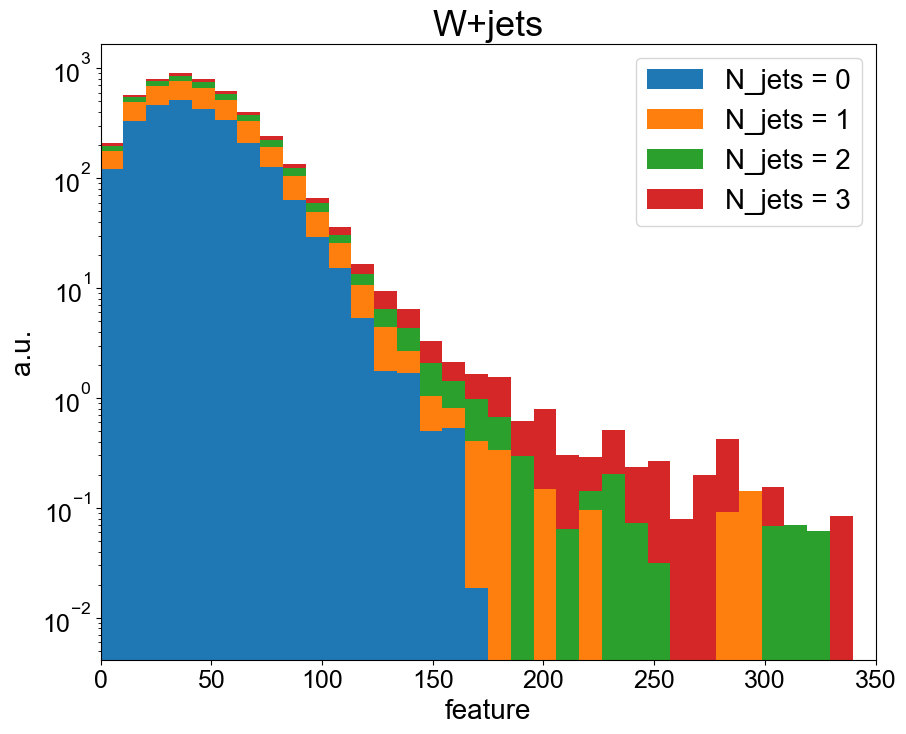

In [35]:
# make the plot
fix, ax = plt.subplots(1, 1, figsize=(10, 8))

feature = 'met_mag'
style_lut = dm._lut_features.loc[feature]
bins = np.linspace(style_lut.xmin, style_lut.xmax, style_lut.n_bins)
x = [dm.get_dataframe(ds)[feature] for ds in datasets]
w = [dm.get_dataframe(ds)['weight'] for ds in datasets]
ax.hist(x, bins, stacked=True, weights=w)
ax.set_xlim(bins[0], bins[-1])
ax.set_ylabel('a.u.')
ax.set_xlabel('feature')
ax.set_title('W+jets')
ax.set_yscale('log')
ax.legend([f'N_jets = {i}' for i in range(4)])

plt.savefig(f'plots/wjets_validation/test.pdf')
plt.show()